In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm1
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [8]:
dataset=pd.read_csv("letter-recognition.data",sep=",")

In [30]:
print(dataset.size)

339983


In [9]:
print(dataset.head(5))

   T  2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0  I  5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1  D  4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2  N  7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3  G  2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4  S  4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7


In [10]:
print(dataset.columns)

Index(['T', '2', '8', '3', '5', '1', '8.1', '13', '0', '6', '6.1', '10', '8.2',
       '0.1', '8.3', '0.2', '8.4'],
      dtype='object')


In [11]:
x=dataset.iloc[:,1:17]
y=dataset.select_dtypes(include=[object])

In [13]:
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x,y,test_size=0.20,random_state=10)

In [15]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [16]:
x_train=scaler.transform(x_train)
x_validation=scaler.transform(x_validation)

In [18]:
mlp=MLPClassifier(hidden_layer_sizes=(250,300),max_iter=1000000,activation='logistic')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


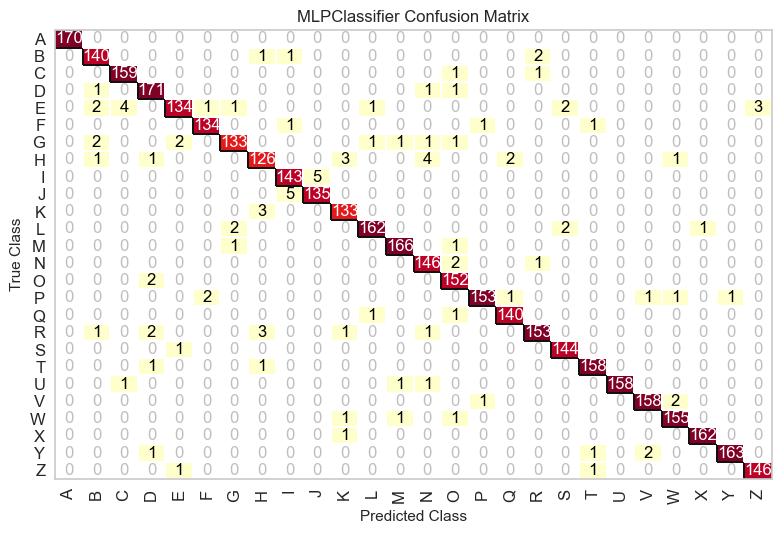

In [25]:
from yellowbrick.classifier import confusion_matrix

cm=confusion_matrix(mlp,x_train,y_train,x_validation,y_validation,classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [26]:
cm.fit(x_train,y_train.values.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001E9E9279510>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [27]:
cm.score(x_validation,y_validation)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9735

In [28]:
predictions=cm.predict(x_validation)

predictions

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [29]:
print("Accuracy= ",accuracy_score(y_validation,predictions))

Accuracy=  0.9735
